In [2]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import functions as f
import functools
df = pd.read_csv("dane/insurance_final.csv")


In [3]:
df

,Unnamed: 0,index,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,1,1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,2,2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,3,3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,4,4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1333,1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1324,1334,1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1325,1335,1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1326,1336,1336,21,25.800,0,2007.94500,0,0,0,0,0,1


In [4]:

from sklearn.metrics import make_scorer

def RMSE(true, pred):
    return np.sqrt(np.mean((true-pred)**2))

rmse_scorer = make_scorer(RMSE, greater_is_better = False)

# np.abs(rmse_scorer(las, X_test_transf, y_test))

# Jakość modelu - metryka MSE

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
las = RandomForestRegressor(n_estimators=500, max_depth = 5, max_features = 6, random_state=1, criterion = 'mse')

X = df.drop(columns = ['charges', 'Unnamed: 0', 'index'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=.2)

las.fit(X_train,y_train)

pred = las.predict(X_train)
print(f'Score na danych treningowych {las.score(X_train, y_train)}')
#print(np.abs(rmse_scorer(las, X_train, y_train)))

pred2 = las.predict(X_test)
print(f'Score na danych testowych {las.score(X_test, y_test)}')
# print(np.abs(rmse_scorer(las, X_test, y_test)))


Score na danych treningowych 0.8797572228017791
Score na danych testowych 0.8900803837127614


In [6]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
452,20,29.735,0,1,0,0,1,0,0
705,31,30.495,3,0,0,1,0,0,0
989,27,20.045,3,0,1,0,1,0,0
115,58,49.060,0,1,0,0,0,1,0
1152,32,41.100,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8,37,29.830,2,1,0,1,0,0,0
241,55,26.800,1,0,0,0,0,0,1
1131,26,22.230,0,0,0,0,1,0,0
490,61,25.080,0,0,0,0,0,1,0


In [7]:
y_test

452      1769.53165
705      6113.23105
989     16420.49455
115     11381.32540
1152     3989.84100
           ...     
8        6406.41070
241     35160.13457
1131     3176.28770
490     24513.09126
653      3410.32400
Name: charges, Length: 266, dtype: float64

In [12]:
df.drop(columns = ['charges', 'Unnamed: 0', 'index'])
# df.drop(columns = ['charges_pred', 'DIFFcharg_predictMINUStarget'])

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1323,50,30.970,3,1,0,0,1,0,0
1324,18,31.920,0,0,0,1,0,0,0
1325,18,36.850,0,0,0,0,0,1,0
1326,21,25.800,0,0,0,0,0,0,1


In [13]:
las.predict(df.drop(columns = ['charges', 'Unnamed: 0', 'index']))

array([18083.63544577,  4354.11851253,  6343.63994223, ...,
        3405.26729726,  2886.67160059, 27907.46447938])

In [14]:
df['charges_pred'] = las.predict(df.drop(columns = ['charges', 'Unnamed: 0', 'index']))
df

,Unnamed: 0,index,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_pred
0,0,0,19,27.900,0,16884.92400,0,1,0,0,0,1,18083.635446
1,1,1,18,33.770,1,1725.55230,1,0,0,0,1,0,4354.118513
2,2,2,28,33.000,3,4449.46200,1,0,0,0,1,0,6343.639942
3,3,3,33,22.705,0,21984.47061,1,0,0,1,0,0,6858.814831
4,4,4,32,28.880,0,3866.85520,1,0,0,1,0,0,4660.513066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1333,1333,50,30.970,3,10600.54830,1,0,0,1,0,0,11640.480332
1324,1334,1334,18,31.920,0,2205.98080,0,0,1,0,0,0,3193.500673
1325,1335,1335,18,36.850,0,1629.83350,0,0,0,0,1,0,3405.267297
1326,1336,1336,21,25.800,0,2007.94500,0,0,0,0,0,1,2886.671601


In [15]:
df['DIFFcharg_predictMINUStarget'] = df['charges_pred'] - df['charges']

In [16]:
print(df[df['DIFFcharg_predictMINUStarget'] > 0].count())
print(df[df['DIFFcharg_predictMINUStarget'] < 0].count())

Unnamed: 0                      1065
index                           1065
age                             1065
bmi                             1065
children                        1065
charges                         1065
sex_male                        1065
smoker_yes                      1065
region_northeast                1065
region_northwest                1065
region_southeast                1065
region_southwest                1065
charges_pred                    1065
DIFFcharg_predictMINUStarget    1065
dtype: int64
Unnamed: 0                      263
index                           263
age                             263
bmi                             263
children                        263
charges                         263
sex_male                        263
smoker_yes                      263
region_northeast                263
region_northwest                263
region_southeast                263
region_southwest                263
charges_pred                    263
D

In [17]:
print(df[df['DIFFcharg_predictMINUStarget'] > 0].mean())
print(df[df['DIFFcharg_predictMINUStarget'] < 0].mean())
print(df.mean())

Unnamed: 0                        667.008451
index                             667.008451
age                                38.303286
bmi                                30.303099
children                            1.006573
charges                          9736.484280
sex_male                            0.515493
smoker_yes                          0.141784
region_northeast                    0.229108
region_northwest                    0.243192
region_southeast                    0.266667
region_southwest                    0.261033
charges_pred                    11148.166563
DIFFcharg_predictMINUStarget     1411.682283
dtype: float64
Unnamed: 0                        666.269962
index                             666.269962
age                                42.965779
bmi                                31.724924
children                            1.467681
charges                         26366.881184
sex_male                            0.456274
smoker_yes                          0.43

In [18]:
print(df['DIFFcharg_predictMINUStarget'].mean()/df['charges'].mean()*100)

0.23598287372207544


# Na danych testowych

In [19]:
df_test = X_test.merge(y_test, how='inner', left_index=True, right_index=True)
df_test

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
452,20,29.735,0,1,0,0,1,0,0,1769.53165
705,31,30.495,3,0,0,1,0,0,0,6113.23105
989,27,20.045,3,0,1,0,1,0,0,16420.49455
115,58,49.060,0,1,0,0,0,1,0,11381.32540
1152,32,41.100,0,0,0,0,0,0,1,3989.84100
...,...,...,...,...,...,...,...,...,...,...
8,37,29.830,2,1,0,1,0,0,0,6406.41070
241,55,26.800,1,0,0,0,0,0,1,35160.13457
1131,26,22.230,0,0,0,0,1,0,0,3176.28770
490,61,25.080,0,0,0,0,0,1,0,24513.09126


In [22]:
# df_test.drop(columns = ['charges', 'Unnamed: 0', 'index'])
# df_test.drop(columns = ['charges_pred', 'DIFFcharg_predictMINUStarget'])

KeyError: "['Unnamed: 0' 'index'] not found in axis"

In [24]:
df_test = X_test.merge(y_test, how='inner', left_index=True, right_index=True)
df_test

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
452,20,29.735,0,1,0,0,1,0,0,1769.53165
705,31,30.495,3,0,0,1,0,0,0,6113.23105
989,27,20.045,3,0,1,0,1,0,0,16420.49455
115,58,49.060,0,1,0,0,0,1,0,11381.32540
1152,32,41.100,0,0,0,0,0,0,1,3989.84100
...,...,...,...,...,...,...,...,...,...,...
8,37,29.830,2,1,0,1,0,0,0,6406.41070
241,55,26.800,1,0,0,0,0,0,1,35160.13457
1131,26,22.230,0,0,0,0,1,0,0,3176.28770
490,61,25.080,0,0,0,0,0,1,0,24513.09126


In [25]:
df_test['charges_pred'] = las.predict(df_test.drop(columns = ['charges']))

In [26]:
df_test['DIFFcharg_predictMINUStarget'] = df_test['charges_pred'] - df_test['charges']

In [27]:
print(df_test[df_test['DIFFcharg_predictMINUStarget'] > 0].count())
print(df_test[df_test['DIFFcharg_predictMINUStarget'] < 0].count())

age                             214
bmi                             214
children                        214
sex_male                        214
smoker_yes                      214
region_northeast                214
region_northwest                214
region_southeast                214
region_southwest                214
charges                         214
charges_pred                    214
DIFFcharg_predictMINUStarget    214
dtype: int64
age                             52
bmi                             52
children                        52
sex_male                        52
smoker_yes                      52
region_northeast                52
region_northwest                52
region_southeast                52
region_southwest                52
charges                         52
charges_pred                    52
DIFFcharg_predictMINUStarget    52
dtype: int64


In [28]:
print(df_test[df_test['DIFFcharg_predictMINUStarget'] > 0].mean())
print(df_test[df_test['DIFFcharg_predictMINUStarget'] < 0].mean())
print(df_test.mean())

age                                38.883178
bmi                                31.095327
children                            0.925234
sex_male                            0.500000
smoker_yes                          0.135514
region_northeast                    0.163551
region_northwest                    0.224299
region_southeast                    0.299065
region_southwest                    0.313084
charges                          9868.689098
charges_pred                    11474.134217
DIFFcharg_predictMINUStarget     1605.445118
dtype: float64
age                                42.846154
bmi                                31.717212
children                            1.692308
sex_male                            0.557692
smoker_yes                          0.461538
region_northeast                    0.269231
region_northwest                    0.269231
region_southeast                    0.307692
region_southwest                    0.153846
charges                         27919.59

# Procentowe niedopasowanie na danych testowych

In [29]:
print(df_test['DIFFcharg_predictMINUStarget'].mean()/df_test['charges'].mean()*100)

1.3722212237434104


# Modelowanie

In [39]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=.2)

In [42]:
regrProjectDataSplit = (X_train, X_test, y_train, y_test)

In [43]:
regrModelsProject = {
    "linear": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(),
    "random_forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(objective="reg:squarederror"),
    "svm": SVR(),
    "knn": KNeighborsRegressor()
}

In [44]:
# funkcja trenująca model
def trainCV(model, data, target, cv=5):
    """
    funkcja przeprowadzająca krosswalidację oraz zwracająca średnie wartości czasów i score'a
    :param model: model estymatora z pakietu sklearn
    :param data: cechy do przeprowadzenia uczenia
    :param target: wartości wyjściowe
    :param cv: ilość podziałów na krosswalidację, domyślnie 5
    """
    # przeprowadzamy kross walidację i zbieramy wyniki
    results = cross_validate(model, data, target, cv=cv)
    # zwracamy średnie ze wszystkich przebiegów
    outputDict = {
        'meanFitTime': results['fit_time'].mean(),
        'meanScoreTime': results['score_time'].mean(),
        'meanScore':  results['test_score'].mean()
    }
    return outputDict

In [45]:
def printResultsCharts(results, figsize=(15, 20)):
    """
    Wyświetlanie wykresów wyników treningu
    :param results: wyniki treningu w postaci słownika list, np. {
        "modelName": [], <- ta lista musi być zawsze, reszta jest opcjonalna
        "meanScore": [], 
        "meanFitTime": [],
        "meanScoreTime": []}
    """
    # pobieramy listę nazw zawartości
    keys = list(results.keys())
    
    # tworzymy kontener na wykresy
    axis_number = len(keys)-1
    fig, axs = plt.subplots(axis_number, 1, figsize=figsize)
    if axis_number > 1:
        for i in range(axis_number):
            axs[i].bar(results[keys[0]],results[keys[i+1]])
            axs[i].set_ylabel(keys[i+1])
            axs[i].set_title(keys[i+1])
            axs[i].set_xlabel(keys[0])
    else:
        axs.bar(results[keys[0]],results[keys[1]])
        axs.set_ylabel(keys[1])
        axs.set_title(keys[1])
        axs.set_xlabel(keys[0])

In [46]:
def TrainAndPrintResults(modelList, dataset, figsize=(15, 20)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, y_train, y_test = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "meanScore": [],
        "meanFitTime": [],
        "meanScoreTime": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        tmpOneRes = trainCV(modelList[oneM], x_train, y_train)
        print("{0} mean train score = {1}".format(oneM,(tmpOneRes['meanScore'])))
        results["modelName"].append(oneM)
        results["meanScore"].append(tmpOneRes['meanScore'])
        results["meanFitTime"].append(tmpOneRes['meanFitTime'])
        results["meanScoreTime"].append(tmpOneRes['meanScoreTime'])
        #finally fit on whole train data
        modelList[oneM].fit(x_train, y_train)
    
    # present results on charts
    printResultsCharts(results, figsize=figsize)

linear mean train score = 0.7396269727633925
decision_tree mean train score = 0.6757557620360689
random_forest mean train score = 0.8244634274802177
xgboost mean train score = 0.7870574600635761
svm mean train score = -0.09791281244259635
knn mean train score = 0.11452512089015525


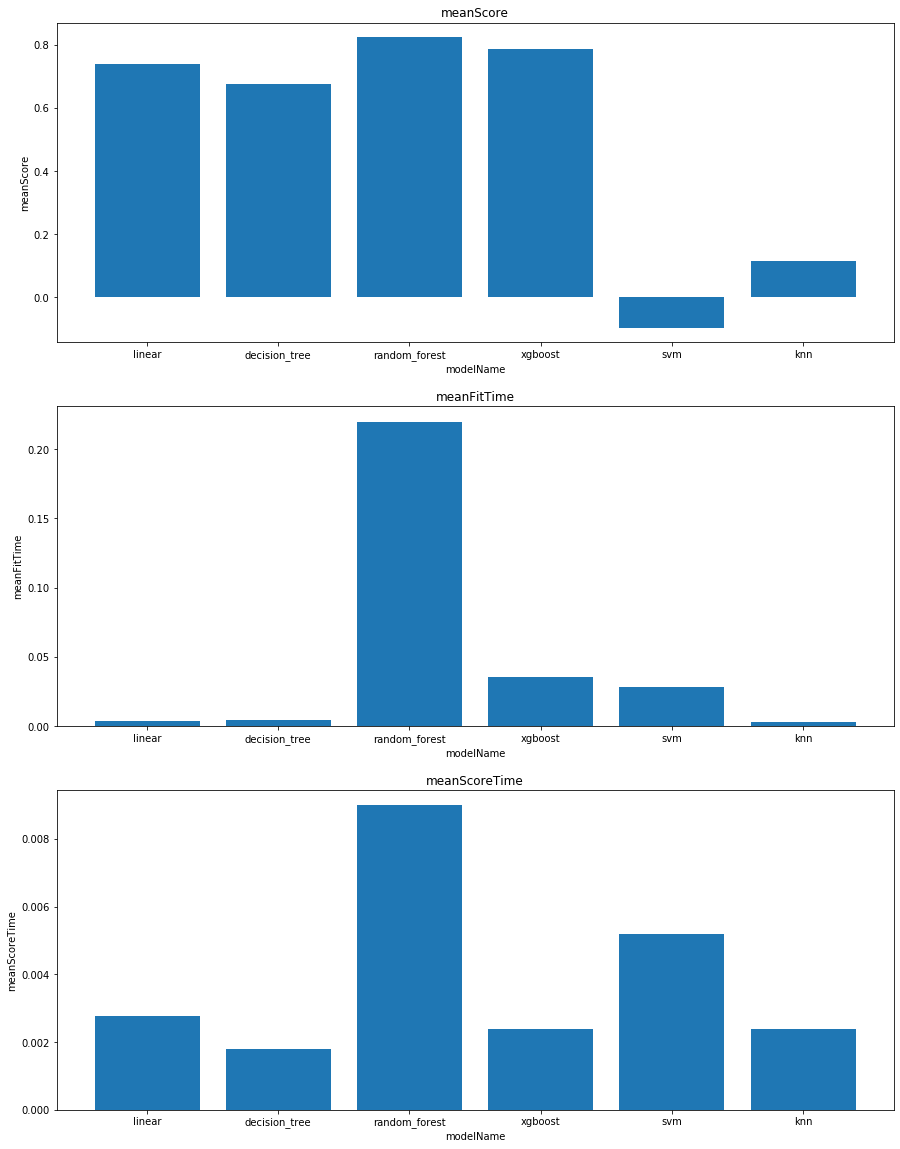

In [47]:
regrProjectResults = TrainAndPrintResults(regrModelsProject, regrProjectDataSplit)

In [48]:
def ValidateAndPrintResults(modelList, dataset, figsize=(15, 5)):
    """
    funkcja przeprowadzająca trening na liście modeli.
    :param modelList: Lista modeli kompatybilnych z pakietem sklearn
    :param dataset: krotka datasetu po podziale na train i test w postaci (x_train, x_test, y_train, y_test)
    """
    # bierzemy z datasetu dane treningowe
    x_train, x_test, y_train, y_test = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "testScore": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        testScore = modelList[oneM].score(x_test, y_test)
        print("{0} score = {1}".format(oneM,testScore))
        results["modelName"].append(oneM)
        results["testScore"].append(testScore)
        
    printResultsCharts(results, figsize=figsize)

linear score = 0.770422545783526
decision_tree score = 0.781614833225953
random_forest score = 0.8799087250472136
xgboost score = 0.8434751040371686
svm score = -0.10865225506596721
knn score = 0.09402926924504584


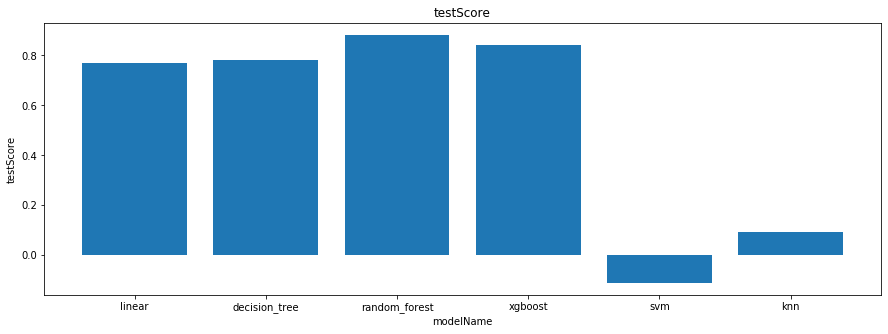

In [49]:
regrProjectResults = ValidateAndPrintResults(regrModelsProject, regrProjectDataSplit)